In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

In [2]:
#importing datasets
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_people = pd.read_csv('Traffic_Crashes_-_People.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()
#dropping dupllicates(basically only having one instance of the crashID on there)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')
#Taking only necessary columns
columns = ['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',  'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION','PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
df_comb = df_dropped[columns]
#Taking the Year from the date column
df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)
#only accidents with the driver
df_driver = df_comb[df_comb['PERSON_TYPE']=='DRIVER']
#necessary columns
new_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'MANEUVER', 'OCCUPANT_CNT', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE','SEX',
       'AGE', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION','DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year']
df_driver = df_driver[new_columns]
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['MODEL'], inplace =True)
df_driver.dropna(axis=0, subset=['MAKE'], inplace =True)
df_driver.dropna(axis=0, subset=['FIRST_CONTACT_POINT'], inplace =True)
#fill in the missing AGE values with the mode of 25
df_driver['AGE'].fillna(df_driver['AGE'].mode()[0], inplace = True) 
df_driver['AGE'].isnull().sum()
# Remove outliers
# By looking at the graph above, we are going to remove data with Vehicle_Year below 1970 and greater than 2022
df_driver = df_driver[df_driver['VEHICLE_YEAR'] < 2022]
df_driver = df_driver[df_driver['VEHICLE_YEAR'] > 1970]
#fill in the missing SEX values with the mode of M
df_driver['SEX'].fillna(df_driver['SEX'].mode()[0], inplace = True) 
df_driver['SEX'].isnull().sum()
#taking out the "UNABLE TO DETERMINE CAUSE" and saving for later
df_driver= df_driver[(df_driver['PRIM_CONTRIBUTORY_CAUSE'] != "UNABLE TO DETERMINE")]
df_driver.to_csv('Cleaned_Crashes')



/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-7573dc712e7e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540478 entries, 0 to 540477
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                540478 non-null  object 
 1   RD_NO                          535865 non-null  object 
 2   CRASH_DATE_EST_I               40975 non-null   object 
 3   CRASH_DATE                     540478 non-null  object 
 4   POSTED_SPEED_LIMIT             540478 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         540478 non-null  object 
 6   DEVICE_CONDITION               540478 non-null  object 
 7   WEATHER_CONDITION              540478 non-null  object 
 8   LIGHTING_CONDITION             540478 non-null  object 
 9   FIRST_CRASH_TYPE               540478 non-null  object 
 10  TRAFFICWAY_TYPE                540478 non-null  object 
 11  LANE_CNT                       198968 non-null  float64
 12  ALIGNMENT                     

In [4]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194482 entries, 0 to 1194481
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1194482 non-null  object 
 1   PERSON_TYPE            1194482 non-null  object 
 2   CRASH_RECORD_ID        1194482 non-null  object 
 3   RD_NO                  1184064 non-null  object 
 4   VEHICLE_ID             1170908 non-null  float64
 5   CRASH_DATE             1194482 non-null  object 
 6   SEAT_NO                244261 non-null   float64
 7   CITY                   878814 non-null   object 
 8   STATE                  889261 non-null   object 
 9   ZIPCODE                802369 non-null   object 
 10  SEX                    1176424 non-null  object 
 11  AGE                    851547 non-null   float64
 12  DRIVERS_LICENSE_STATE  704797 non-null   object 
 13  DRIVERS_LICENSE_CLASS  607436 non-null   object 
 14  SAFETY_EQUIPMENT  

In [5]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105911 entries, 0 to 1105910
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1105911 non-null  int64  
 1   CRASH_RECORD_ID           1105911 non-null  object 
 2   RD_NO                     1096334 non-null  object 
 3   CRASH_DATE                1105911 non-null  object 
 4   UNIT_NO                   1105911 non-null  int64  
 5   UNIT_TYPE                 1104315 non-null  object 
 6   NUM_PASSENGERS            165722 non-null   float64
 7   VEHICLE_ID                1080617 non-null  float64
 8   CMRC_VEH_I                20447 non-null    object 
 9   MAKE                      1080612 non-null  object 
 10  MODEL                     1080469 non-null  object 
 11  LIC_PLATE_STATE           986287 non-null   object 
 12  VEHICLE_YEAR              904574 non-null   float64
 13  VEHICLE_DEFECT            1

In [76]:
#merging datasets on 'Crash_record_ID' as per description on Chicago website
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge.head()

,index,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105911 entries, 0 to 1105910
Columns: 121 entries, index to HAZMAT_CLASS
dtypes: float64(21), int64(8), object(92)
memory usage: 1020.9+ MB


In [8]:
df_merge.shape

(1105911, 121)

In [77]:
#merging datasets on 'Crash_record_ID' as per description on Chicago website (3rd dataset)
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()
df_merge_2.head()

,level_0,index,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,1,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,2,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,4,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [10]:
#how many unique car accidents there are in the dataset
len(df_merge_2['CRASH_RECORD_ID'].unique())

539371

In [11]:
list(df_merge_2.columns)

['level_0',
 'index',
 'CRASH_RECORD_ID',
 'RD_NO_x',
 'CRASH_DATE_EST_I',
 'CRASH_DATE_x',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'LOCATIO

In [12]:
#dropping dupllicates(basically only having one instance of the crashID on there)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')
df_dropped.head()

,level_0,index,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,IMPROPER BACKING,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
6,6,2,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,...,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
12,12,4,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
21,21,7,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
27,27,9,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,...,NaN,IMPROPER BACKING,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539371 entries, 0 to 2527117
Columns: 151 entries, level_0 to CELL_PHONE_USE
dtypes: float64(25), int64(9), object(117)
memory usage: 625.5+ MB


In [14]:
df_dropped.isnull().sum()

level_0                     0
index                       0
CRASH_RECORD_ID             0
RD_NO_x                  4594
CRASH_DATE_EST_I       498620
                        ...  
PEDPEDAL_VISIBILITY    534615
PEDPEDAL_LOCATION      534596
BAC_RESULT              13861
BAC_RESULT VALUE       537990
CELL_PHONE_USE         538529
Length: 151, dtype: int64

In [15]:
print(list(df_dropped.columns))

['level_0', 'index', 'CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_EST_I', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_UNIT_ID', 'RD_NO_y', 'CRASH_DATE_y', 'U

In [16]:
columns = ['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',  'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION','PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']

In [17]:
len(columns)

76

In [18]:
print(list(columns))

['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCU

In [19]:
df_comb = df_dropped[columns]
len(df_comb.columns)

76

In [20]:
df_comb['CRASH_DATE_x'].value_counts()

12/29/2020 05:00:00 PM    30
11/10/2017 10:30:00 AM    27
01/12/2019 02:30:00 PM    20
11/10/2017 10:00:00 AM    20
02/04/2021 02:00:00 PM    18
                          ..
01/01/2018 02:46:00 AM     1
07/22/2019 06:50:00 PM     1
09/01/2021 10:42:00 AM     1
07/31/2018 11:47:00 PM     1
06/08/2018 11:35:00 PM     1
Name: CRASH_DATE_x, Length: 351941, dtype: int64

In [21]:
df_comb['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 201647
FAILING TO YIELD RIGHT-OF-WAY                                                        58994
FOLLOWING TOO CLOSELY                                                                56122
NOT APPLICABLE                                                                       28793
IMPROPER OVERTAKING/PASSING                                                          25720
FAILING TO REDUCE SPEED TO AVOID CRASH                                               23365
IMPROPER BACKING                                                                     23192
IMPROPER LANE USAGE                                                                  20556
IMPROPER TURNING/NO SIGNAL                                                           17869
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  17118
DISREGARDING TRAFFIC SIGNALS                                                         10077

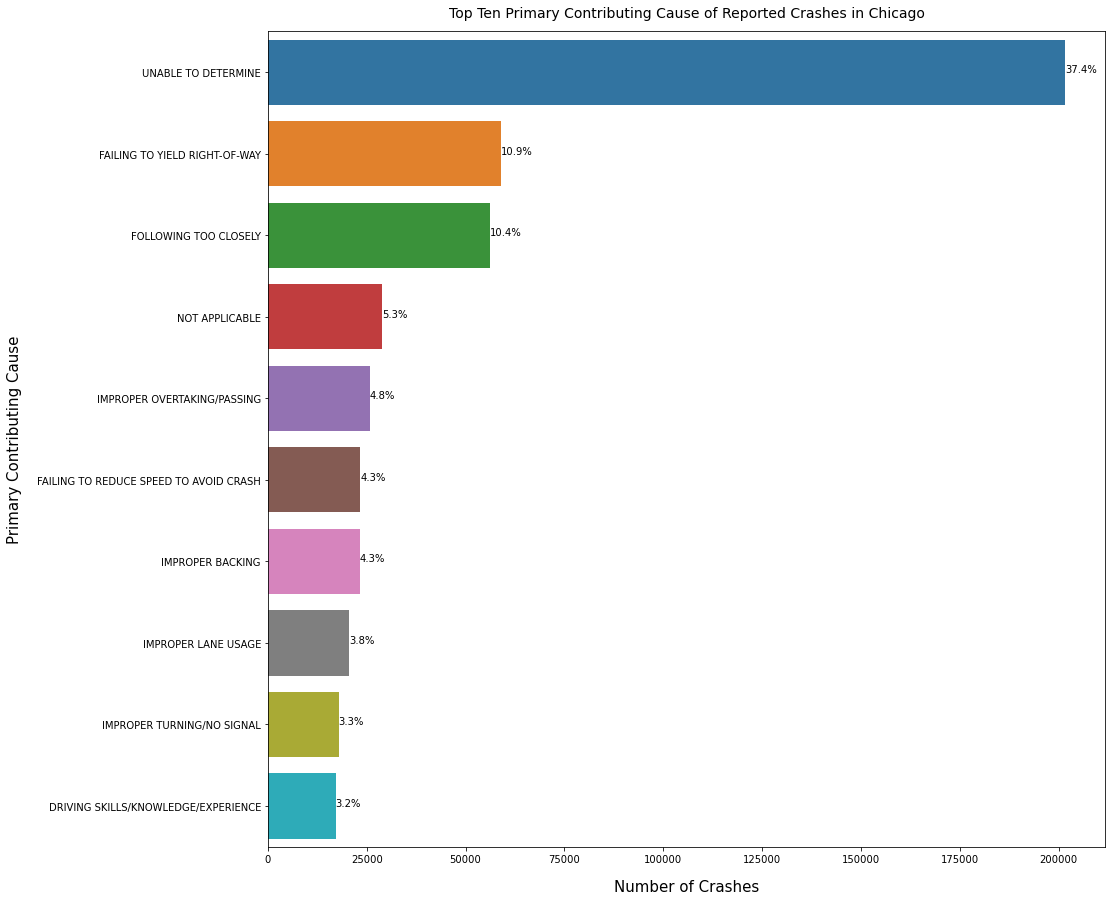

In [22]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(data=df_comb,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_comb['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:10].index)
total = len(df_comb['PRIM_CONTRIBUTORY_CAUSE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Top Ten Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=15, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=15, labelpad=15)
plt.show();

In [23]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539371 entries, 0 to 2527117
Data columns (total 76 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                539371 non-null  object 
 1   RD_NO_x                        534777 non-null  object 
 2   CRASH_DATE_x                   539371 non-null  object 
 3   POSTED_SPEED_LIMIT             539371 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         539371 non-null  object 
 5   DEVICE_CONDITION               539371 non-null  object 
 6   WEATHER_CONDITION              539371 non-null  object 
 7   LIGHTING_CONDITION             539371 non-null  object 
 8   FIRST_CRASH_TYPE               539371 non-null  object 
 9   TRAFFICWAY_TYPE                539371 non-null  object 
 10  LANE_CNT                       198616 non-null  float64
 11  ALIGNMENT                      539371 non-null  object 
 12  ROADWAY_SURFACE_COND         

In [24]:
pd.isnull(df_comb).sum()

CRASH_RECORD_ID                0
RD_NO_x                     4594
CRASH_DATE_x                   0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
                           ...  
PEDPEDAL_VISIBILITY       534615
PEDPEDAL_LOCATION         534596
BAC_RESULT                 13861
BAC_RESULT VALUE          537990
CELL_PHONE_USE            538529
Length: 76, dtype: int64

In [25]:
df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)
df_comb

<ipython-input-25-fff3ae90c248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
<ipython-input-25-fff3ae90c248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)


,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,date,Crash_year
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2019-07-10 17:56:00,2019
6,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2017-06-30 16:00:00,2017
12,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2020-07-10 10:25:00,2020
21,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2020-07-11 01:00:00,2020
27,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,...,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2020-07-08 14:00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527105,9a9db62f3334a1fad706f97c5a4ebb8485668447c176e2...,JE299347,07/12/2021 06:37:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2021-07-12 18:37:00,2021
2527107,db31327d28803316b8f44f0ec86d6e76a248934f3d1bfc...,JE295652,07/07/2021 09:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2021-07-07 21:25:00,2021
2527111,d51aae396db49981c7ee26ceb54dfcab3c4b06d0cc5d7d...,JE298826,07/12/2021 10:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,ONE-WAY,...,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2021-07-12 10:00:00,2021
2527115,6f9abc7e7f54095cef0fa17e16e6f72eb14f8d17d3b572...,JE300245,07/13/2021 04:15:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,2021-07-13 16:15:00,2021


In [26]:
df_comb['PERSON_TYPE'].value_counts()

DRIVER                 520611
PASSENGER               13604
BICYCLE                  2847
PEDESTRIAN               1797
NON-MOTOR VEHICLE         394
NON-CONTACT VEHICLE       118
Name: PERSON_TYPE, dtype: int64

In [27]:
df_driver = df_comb[df_comb['PERSON_TYPE']=='DRIVER']
df_driver['PERSON_TYPE'].value_counts()

DRIVER    520611
Name: PERSON_TYPE, dtype: int64

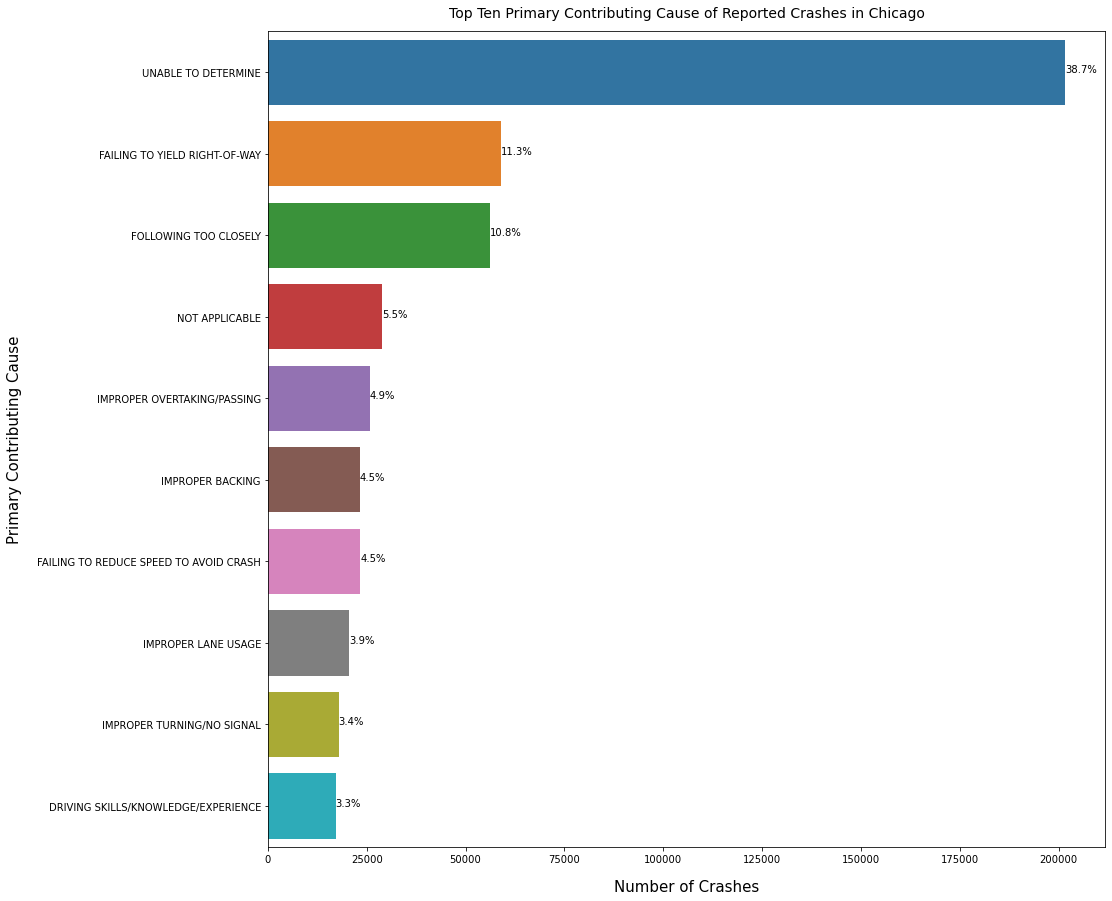

In [28]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(data=df_comb,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_driver['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:10].index)
total = len(df_driver['PRIM_CONTRIBUTORY_CAUSE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Top Ten Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=15, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=15, labelpad=15)
plt.show();

In [29]:
for i in df_driver.columns:
    x = df_driver[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print('')
    #going to want to drop rows with vehicle defects other than 'NONE'
    # Check out the vehicle types
    #vehicle Year has some outliers
    

Column name is: CRASH_RECORD_ID and it value is: d43582ad7031a939fd21be0260b40afd97d54af64ab51d72bec8969ef8c3bacfddeb70c4fc949d57de520248526f5d7fb12c227b07582f4dfed509a46a5e8f00    1
fbdc3b475af1be91848af71598a15619cd064adbfa21d1b7b7f95ddbe4650d5af3e20277e837d5a6f587764895111b42b1a713f5e7e15e5878b5c1386c63ec77    1
601b0fab0b789358cd1f67507682e38adce8b69d77053ce608f0b0447a9115f6964a97bd6632b0317fff968715580f2c402634e0e81482409cb4abeb76faa216    1
49d99294bbfa9df2e1214c6fdd89ec0e57b4125d2e719bea93ebe4788a101d9924d6c9822c0ad37b39bb11381448deaaae1c24c4fd0904f1d3b63ad4e3fe7465    1
9b4c8badc23c689920795bc4d399b7350cec485a10b1f97ebcd7c483efe65b44af08b1ff86ccae4256e5af09ea67a021496e27015ffa94be1731f4d2e7d81629    1
                                                                                                                                   ..
8894867c40c0612f206476f5dde01006f591b456746fd21d507299b2bd4f511d0287e32e41f50ee4ef5285c1d717749131a48121de7644f9eb68c3175d1a36c5    1
df784838b1202

Column name is: INTERSECTION_RELATED_I and it value is: Y    111169
N      5543
Name: INTERSECTION_RELATED_I, dtype: int64

Column name is: NOT_RIGHT_OF_WAY_I and it value is: Y    22465
N     2166
Name: NOT_RIGHT_OF_WAY_I, dtype: int64

Column name is: HIT_AND_RUN_I and it value is: Y    151434
N      6644
Name: HIT_AND_RUN_I, dtype: int64

Column name is: DAMAGE and it value is: OVER $1,500      306363
$501 - $1,500    150660
$500 OR LESS      63588
Name: DAMAGE, dtype: int64

Column name is: PRIM_CONTRIBUTORY_CAUSE and it value is: UNABLE TO DETERMINE                                                                 195756
FAILING TO YIELD RIGHT-OF-WAY                                                        56266
FOLLOWING TOO CLOSELY                                                                54607
NOT APPLICABLE                                                                       27514
IMPROPER OVERTAKING/PASSING                                                          24971
IMPR

Column name is: STREET_DIRECTION and it value is: W    185188
S    174786
N    124292
E     36342
Name: STREET_DIRECTION, dtype: int64

Column name is: STREET_NAME and it value is: WESTERN AVE                 14282
PULASKI RD                  12366
CICERO AVE                  11416
ASHLAND AVE                 11296
HALSTED ST                   9967
                            ...  
BOWLING GREEN DR                1
94TH PL                         1
WALTER BURLEY GRIFFIN PL        1
26TH PL                         1
23RD STZHZ                      1
Name: STREET_NAME, Length: 1580, dtype: int64

Column name is: DOORING_I and it value is: Y    613
N    448
Name: DOORING_I, dtype: int64

Column name is: WORK_ZONE_I and it value is: Y    2593
N     689
Name: WORK_ZONE_I, dtype: int64

Column name is: WORK_ZONE_TYPE and it value is: CONSTRUCTION    1829
UNKNOWN          340
MAINTENANCE      262
UTILITY          162
Name: WORK_ZONE_TYPE, dtype: int64

Column name is: WORKERS_PRESENT_I and it

Column name is: MODEL and it value is: UNKNOWN                          122334
OTHER (EXPLAIN IN NARRATIVE)      33481
CAMRY                             14399
COROLLA                            8534
CIVIC                              8005
                                  ...  
HYSTER CORP.                          1
RX-3                                  1
SURELOAD                              1
HYDE CORP.                            1
HENDRICKSON MANUFACTURING CO.         1
Name: MODEL, Length: 2042, dtype: int64

Column name is: VEHICLE_YEAR and it value is: 2015.0    26764
2016.0    24664
2014.0    24399
2017.0    22780
2013.0    22530
          ...  
2210.0        1
3023.0        1
6414.0        1
7007.0        1
2049.0        1
Name: VEHICLE_YEAR, Length: 149, dtype: int64

Column name is: VEHICLE_DEFECT and it value is: UNKNOWN             280701
NONE                229750
OTHER                 3441
BRAKES                2656
TIRES                  453
STEERING               435
W

Column name is: PEDPEDAL_LOCATION and it value is: Series([], Name: PEDPEDAL_LOCATION, dtype: int64)

Column name is: BAC_RESULT and it value is: TEST NOT OFFERED                   512361
TEST REFUSED                         5204
TEST TAKEN                           1542
TEST PERFORMED, RESULTS UNKNOWN      1504
Name: BAC_RESULT, dtype: int64

Column name is: BAC_RESULT VALUE and it value is: 0.00    128
0.18    100
0.17     92
0.21     86
0.20     79
0.14     76
0.16     68
0.22     63
0.15     62
0.23     58
0.19     54
0.11     51
0.13     51
0.12     48
0.24     44
0.26     31
0.27     27
0.10     26
0.09     25
0.25     25
0.28     19
0.04     14
0.07     14
0.30     14
0.03     13
0.29     13
0.08     13
0.33     11
0.05     10
0.32      9
0.31      6
0.02      6
0.06      6
0.38      5
0.35      5
0.34      4
0.36      3
0.44      2
0.88      2
0.01      2
0.39      2
0.45      2
0.60      2
0.58      1
1.00      1
0.47      1
0.99      1
0.80      1
0.79      1
0.95      1
0.67

In [30]:
df_driver.columns

Index(['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE',
       'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE',

In [31]:
#going to drop columns with lots of missing values

In [32]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                0
RD_NO_x                     3994
CRASH_DATE_x                   0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
                           ...  
BAC_RESULT                     0
BAC_RESULT VALUE          519231
CELL_PHONE_USE            519792
date                           0
Crash_year                     0
Length: 78, dtype: int64

In [33]:
new_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'MANEUVER', 'OCCUPANT_CNT', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE','SEX',
       'AGE', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION','DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year']

In [34]:
df_driver = df_driver[new_columns]


In [35]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


In [37]:
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['MODEL'], inplace =True)
df_driver.dropna(axis=0, subset=['MAKE'], inplace =True)
df_driver.dropna(axis=0, subset=['FIRST_CONTACT_POINT'], inplace =True)

In [38]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


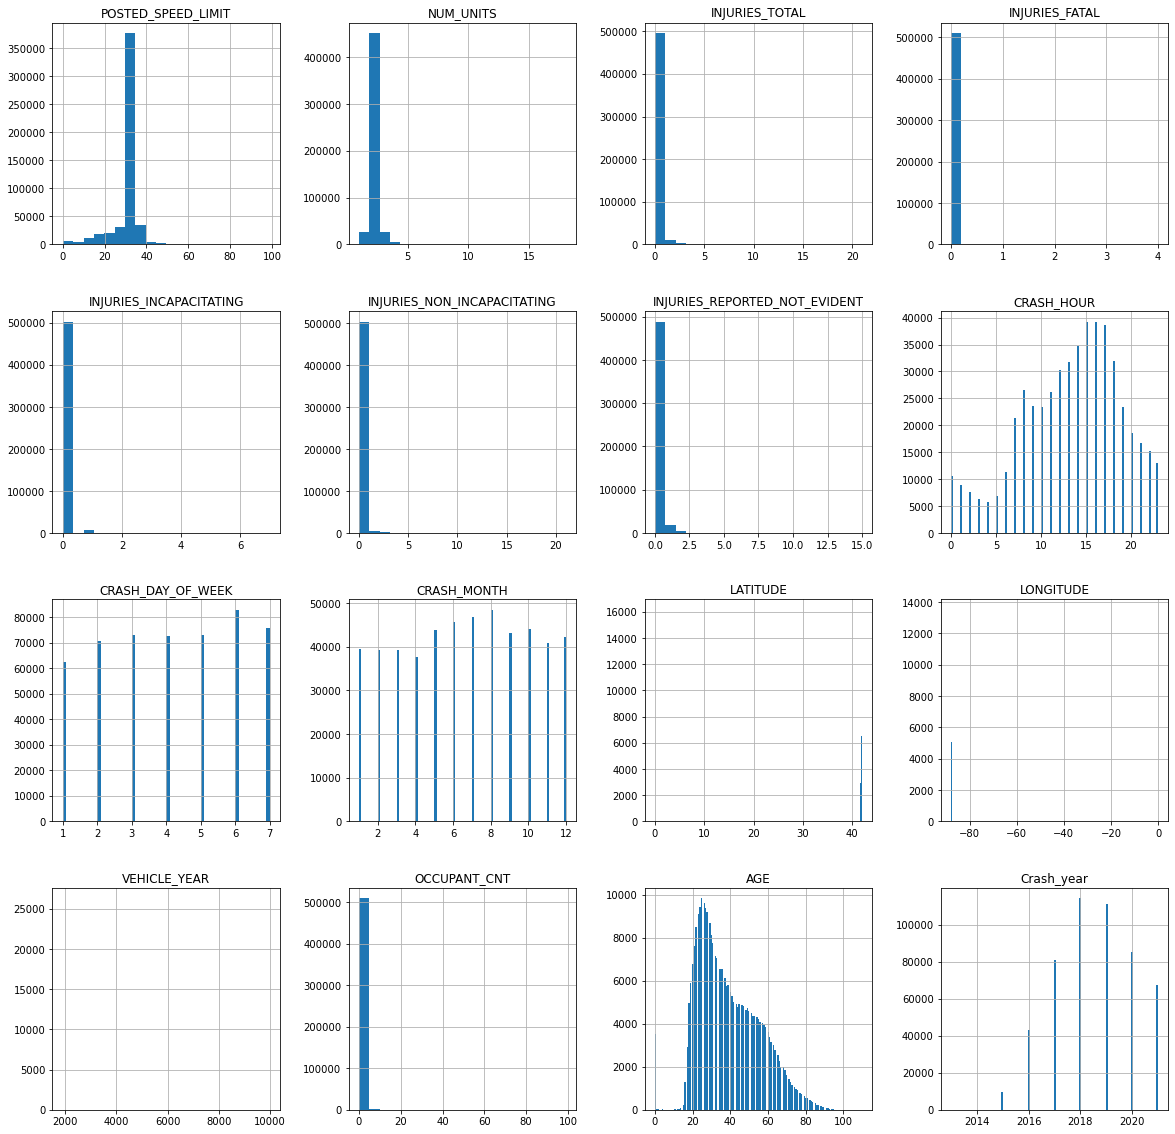

In [39]:
df_driver.hist(figsize=(20,20), bins='auto');

In [40]:
print(df_driver['AGE'].describe())
print(df_driver['AGE'].isnull().sum())

count    307315.000000
mean         39.212359
std          16.402120
min           0.000000
25%          26.000000
50%          36.000000
75%          51.000000
max         110.000000
Name: AGE, dtype: float64
203552


In [41]:
df_driver['AGE'].value_counts()

25.0     9820
26.0     9600
24.0     9421
27.0     9381
28.0     9171
         ... 
5.0         2
109.0       1
107.0       1
110.0       1
108.0       1
Name: AGE, Length: 108, dtype: int64

In [42]:
#fill in the missing AGE values with the mode of 25
df_driver['AGE'].fillna(df_driver['AGE'].mode()[0], inplace = True) 
df_driver['AGE'].isnull().sum()

0

In [43]:
df_driver['VEHICLE_YEAR'].describe()

count    378000.000000
mean       2015.467288
std         213.468344
min        1900.000000
25%        2005.000000
50%        2010.000000
75%        2015.000000
max        9999.000000
Name: VEHICLE_YEAR, dtype: float64

In [44]:
# Remove outliers

# By looking at the graph above, we are going to remove data with Vehicle_Year below 1970 and greater than 2022
df_driver = df_driver[df_driver['VEHICLE_YEAR'] < 2022]
df_driver = df_driver[df_driver['VEHICLE_YEAR'] > 1970]
print(df_driver['VEHICLE_YEAR'].describe())
print(df_driver['VEHICLE_YEAR'].isnull().sum())

count    377216.000000
mean       2009.642976
std           6.242653
min        1971.000000
25%        2005.000000
50%        2010.000000
75%        2015.000000
max        2021.000000
Name: VEHICLE_YEAR, dtype: float64
0


In [45]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                   0
CRASH_DATE_x                      0
POSTED_SPEED_LIMIT                0
TRAFFIC_CONTROL_DEVICE            0
DEVICE_CONDITION                  0
WEATHER_CONDITION                 0
LIGHTING_CONDITION                0
FIRST_CRASH_TYPE                  0
TRAFFICWAY_TYPE                   0
ALIGNMENT                         0
ROADWAY_SURFACE_COND              0
ROAD_DEFECT                       0
CRASH_TYPE                        0
DAMAGE                            0
PRIM_CONTRIBUTORY_CAUSE           0
SEC_CONTRIBUTORY_CAUSE            0
NUM_UNITS                         0
MOST_SEVERE_INJURY                0
INJURIES_TOTAL                    0
INJURIES_FATAL                    0
INJURIES_INCAPACITATING           0
INJURIES_NON_INCAPACITATING       0
INJURIES_REPORTED_NOT_EVIDENT     0
CRASH_HOUR                        0
CRASH_DAY_OF_WEEK                 0
CRASH_MONTH                       0
LATITUDE                          0
LONGITUDE                   

In [46]:
df_driver['SEX'].value_counts()

M    226014
F    134585
X     16593
Name: SEX, dtype: int64

In [47]:
#fill in the missing SEX values with the mode of M
df_driver['SEX'].fillna(df_driver['SEX'].mode()[0], inplace = True) 
df_driver['SEX'].isnull().sum()

0

In [48]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                  0
CRASH_DATE_x                     0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
LATITUDE                         0
LONGITUDE                        0
MAKE                

In [49]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377216 entries, 0 to 2527117
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                377216 non-null  object 
 1   CRASH_DATE_x                   377216 non-null  object 
 2   POSTED_SPEED_LIMIT             377216 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         377216 non-null  object 
 4   DEVICE_CONDITION               377216 non-null  object 
 5   WEATHER_CONDITION              377216 non-null  object 
 6   LIGHTING_CONDITION             377216 non-null  object 
 7   FIRST_CRASH_TYPE               377216 non-null  object 
 8   TRAFFICWAY_TYPE                377216 non-null  object 
 9   ALIGNMENT                      377216 non-null  object 
 10  ROADWAY_SURFACE_COND           377216 non-null  object 
 11  ROAD_DEFECT                    377216 non-null  object 
 12  CRASH_TYPE                   

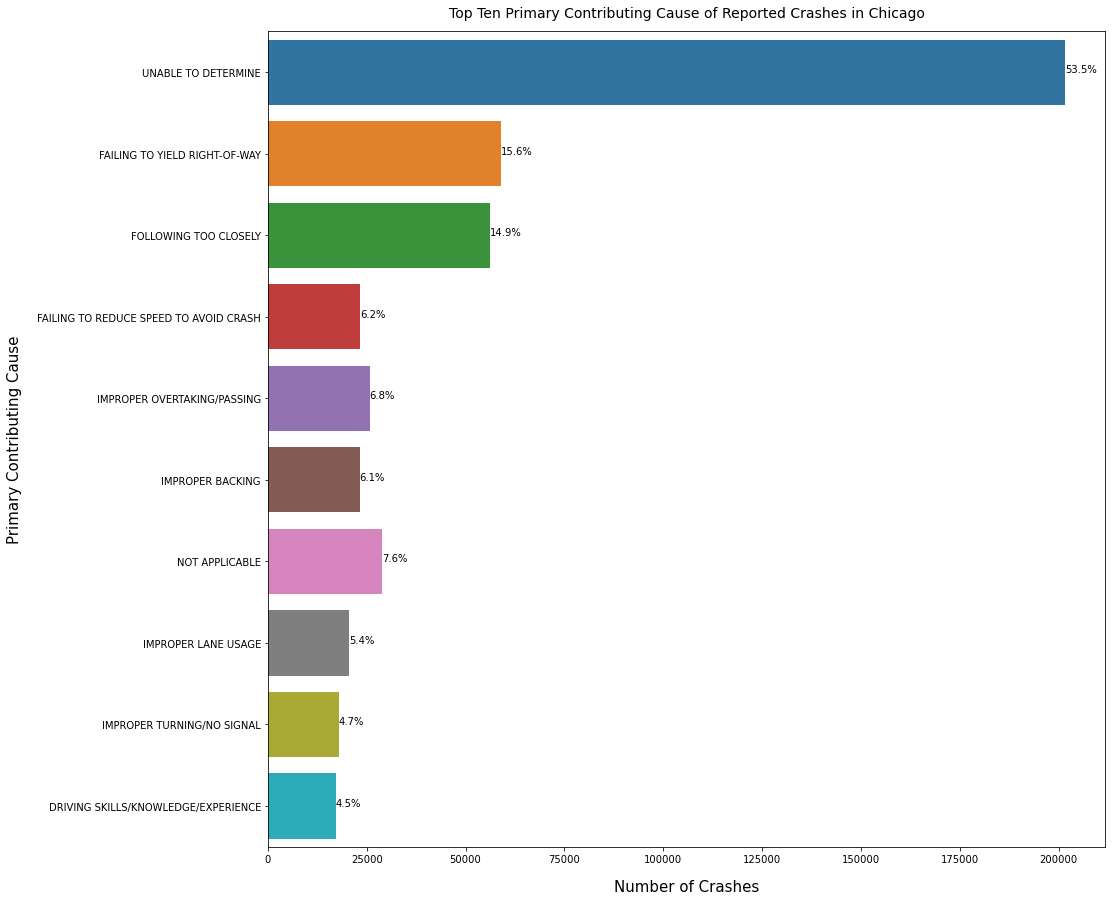

In [50]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(data=df_comb,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_driver['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:10].index)
total = len(df_driver['PRIM_CONTRIBUTORY_CAUSE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Top Ten Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=15, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=15, labelpad=15)
plt.show();

In [51]:
df_driver= df_driver[(df_driver['PRIM_CONTRIBUTORY_CAUSE'] != "UNABLE TO DETERMINE")]

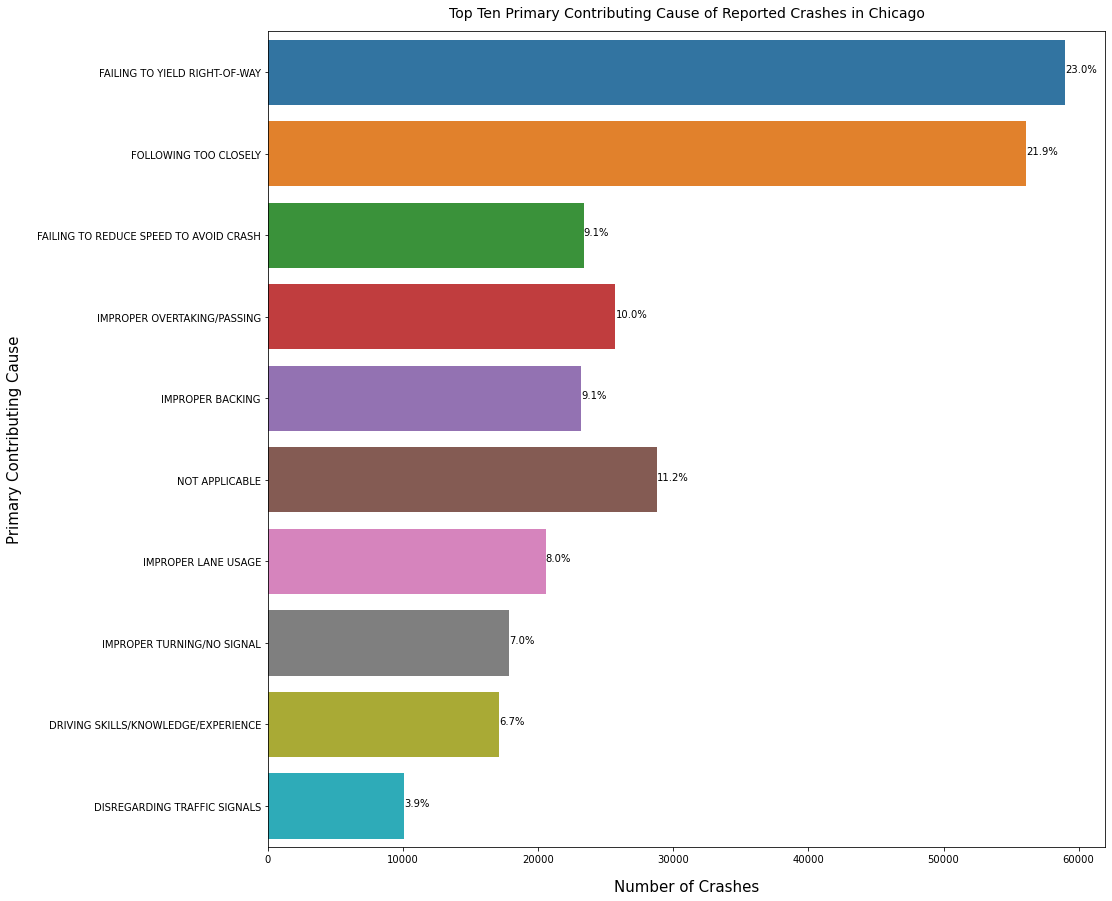

In [52]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(data=df_comb,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_driver['PRIM_CONTRIBUTORY_CAUSE'].value_counts().iloc[:10].index)
total = len(df_driver['PRIM_CONTRIBUTORY_CAUSE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Top Ten Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=15, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=15, labelpad=15)
plt.show();

In [53]:
df_driver['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       47223
FOLLOWING TOO CLOSELY                                                               44791
FAILING TO REDUCE SPEED TO AVOID CRASH                                              18307
IMPROPER OVERTAKING/PASSING                                                         18059
IMPROPER BACKING                                                                    17924
NOT APPLICABLE                                                                      16561
IMPROPER LANE USAGE                                                                 15212
IMPROPER TURNING/NO SIGNAL                                                          14108
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 12743
DISREGARDING TRAFFIC SIGNALS                                                         7375
WEATHER                                                                              7254
OPERATING 

In [54]:
#Have some imbalanced Causes. Want to use the SMOTE method

In [55]:
df_driver

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,FIRST_CONTACT_POINT,PERSON_TYPE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,Crash_year
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,REAR,DRIVER,M,31.0,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,2019
6,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,REAR-RIGHT,DRIVER,F,20.0,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2017
12,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,TOTAL (ALL AREAS),DRIVER,M,50.0,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,2020
37,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,07/10/2020 10:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,SIDE-RIGHT,DRIVER,M,26.0,NOT APPLICABLE,NONE,NONINCAPACITATING INJURY,NOT OBSCURED,NORMAL,2020
45,0209e21f298984f7375742b7ef27c9880b485f41123a12...,08/30/2018 05:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,REAR-RIGHT,DRIVER,M,44.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527039,93c6ee69063051faa9c7c3e9ecbcdbb6435b3f755479f4...,07/13/2021 02:30:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,REAR-LEFT,DRIVER,M,25.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,MOVING VEHICLES,NORMAL,2021
2527041,e04baeb18b76d2c2d813872715cfa3faa56ee721ad22fa...,06/23/2021 01:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,...,REAR-LEFT,DRIVER,F,65.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2021
2527085,643c6beb006b42fb054f450e296628f9883409ffac1c89...,07/13/2021 04:37:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,...,SIDE-RIGHT,DRIVER,M,31.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,2021
2527093,7daca9bc29b50037c4b2cf6f61508e01237930b6194b67...,06/20/2021 03:26:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,OTHER,DRIVER,F,23.0,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,NOT OBSCURED,NORMAL,2021


In [56]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256056 entries, 0 to 2527105
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                256056 non-null  object 
 1   CRASH_DATE_x                   256056 non-null  object 
 2   POSTED_SPEED_LIMIT             256056 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         256056 non-null  object 
 4   DEVICE_CONDITION               256056 non-null  object 
 5   WEATHER_CONDITION              256056 non-null  object 
 6   LIGHTING_CONDITION             256056 non-null  object 
 7   FIRST_CRASH_TYPE               256056 non-null  object 
 8   TRAFFICWAY_TYPE                256056 non-null  object 
 9   ALIGNMENT                      256056 non-null  object 
 10  ROADWAY_SURFACE_COND           256056 non-null  object 
 11  ROAD_DEFECT                    256056 non-null  object 
 12  CRASH_TYPE                   

In [57]:
df_driver.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year'],
      dtype='object')

In [60]:
cat_feats = [
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY', 'MAKE', 'MODEL',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX',  'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION',]

#cat_feats.drop(['CRASH_RECORD_ID','CRASH_DATE_x','PRIM_CONTRIBUTORY_CAUSE'], axis=1,inplace=True)


In [61]:


# getting dummies

df_driver_2 =  pd.get_dummies(df_driver, columns = cat_feats, drop_first = True )


In [62]:
df_driver_2.shape

(256056, 2625)

In [78]:
from sklearn.model_selection import train_test_split


In [73]:
df_driver_2

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,CRASH_HOUR,...,PHYSICAL_CONDITION_HAD BEEN DRINKING,PHYSICAL_CONDITION_ILLNESS/FAINTED,PHYSICAL_CONDITION_IMPAIRED - ALCOHOL,PHYSICAL_CONDITION_IMPAIRED - ALCOHOL AND DRUGS,PHYSICAL_CONDITION_IMPAIRED - DRUGS,PHYSICAL_CONDITION_MEDICATED,PHYSICAL_CONDITION_NORMAL,PHYSICAL_CONDITION_OTHER,PHYSICAL_CONDITION_REMOVED BY EMS,PHYSICAL_CONDITION_UNKNOWN
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,2.0,0.0,0.0,0.0,0.0,0.0,17,...,0,0,0,0,0,0,1,0,0,0
6,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,2.0,0.0,0.0,0.0,0.0,0.0,16,...,0,0,0,0,0,0,0,0,0,1
12,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,3.0,0.0,0.0,0.0,0.0,0.0,10,...,0,0,0,0,0,0,1,0,0,0
37,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,07/10/2020 10:20:00 PM,30,2.0,1.0,0.0,0.0,1.0,0.0,22,...,0,0,0,0,0,0,1,0,0,0
45,0209e21f298984f7375742b7ef27c9880b485f41123a12...,08/30/2018 05:45:00 PM,30,2.0,0.0,0.0,0.0,0.0,0.0,17,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527039,93c6ee69063051faa9c7c3e9ecbcdbb6435b3f755479f4...,07/13/2021 02:30:00 PM,30,2.0,0.0,0.0,0.0,0.0,0.0,14,...,0,0,0,0,0,0,1,0,0,0
2527041,e04baeb18b76d2c2d813872715cfa3faa56ee721ad22fa...,06/23/2021 01:30:00 PM,10,2.0,0.0,0.0,0.0,0.0,0.0,13,...,0,0,0,0,0,0,0,0,0,1
2527085,643c6beb006b42fb054f450e296628f9883409ffac1c89...,07/13/2021 04:37:00 PM,30,2.0,0.0,0.0,0.0,0.0,0.0,16,...,0,0,0,0,0,0,1,0,0,0
2527093,7daca9bc29b50037c4b2cf6f61508e01237930b6194b67...,06/20/2021 03:26:00 PM,30,2.0,3.0,0.0,0.0,1.0,2.0,15,...,0,0,0,0,0,0,1,0,0,0


In [80]:
X = df_driver.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df_driver['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
from sklearn.dummy import DummyClassifier

In [85]:
dummy = DummyClassifier()

In [86]:
dummy.fit(X_train,y_train)

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

In [87]:
dummy.predict(X_train)

array(['DISREGARDING ROAD MARKINGS', 'EQUIPMENT - VEHICLE CONDITION',
       'IMPROPER OVERTAKING/PASSING', ..., 'FOLLOWING TOO CLOSELY',
       'FAILING TO YIELD RIGHT-OF-WAY',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'], dtype=object)

In [88]:
dummy.score(X_train, y_train)

0.09441684631486862